In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv(r'/content/drive/MyDrive/study/spam.csv',encoding= 'latin_1')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
data.rename(columns={'v1': 'Target', 'v2': 'Email'}, inplace=True)
data.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Mapping the target labels to 0 and 1
data['Target']=data['Target'].map({'ham': 0, 'spam': 1})

data.head()

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Setting a color palette
palette=sns.color_palette("Spectral")
sns.set(palette=palette)

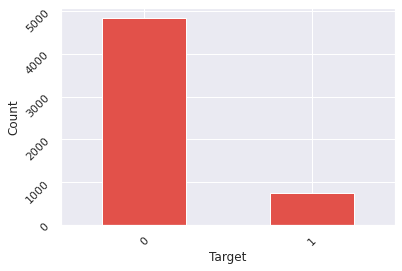

In [10]:
#Plotting Spam(1) vs Not Spam(0) value counts
data['Target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.tick_params(rotation=45)
plt.show()

In [11]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['Email'], data['Target'], test_size=0.2, random_state=5)
X_train.head()

1658    RGENT! This is the 2nd attempt to contact U!U ...
1509    When u love someone Dont make them to love u a...
3266                    Ok then i come n pick u at engin?
5199           Ugh my leg hurts. Musta overdid it on mon.
3217      Don know:)this week i'm going to tirunelvai da.
Name: Email, dtype: object

In [12]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Spectral')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [13]:
X_train.isnull().any()

False

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_valid)

tfidf_matrix_train.shape

(4457, 7562)

# KNN

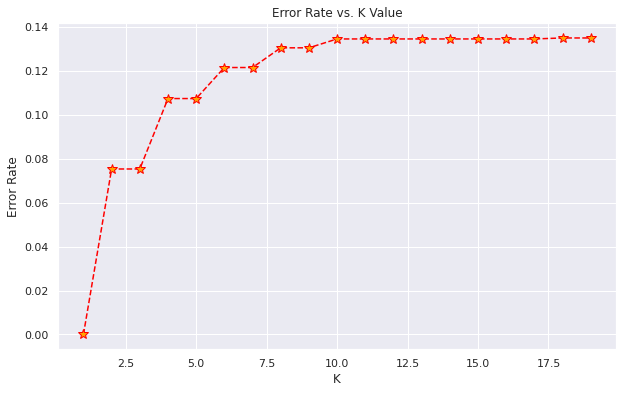

In [15]:
#Visualization to find the best K value
from sklearn.neighbors import KNeighborsClassifier
 
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='red', linestyle='dashed', 
         marker='*',markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

KNN Accuracy Score: 88.07%
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       978
           1       1.00      0.03      0.06       137

    accuracy                           0.88      1115
   macro avg       0.94      0.51      0.50      1115
weighted avg       0.89      0.88      0.83      1115



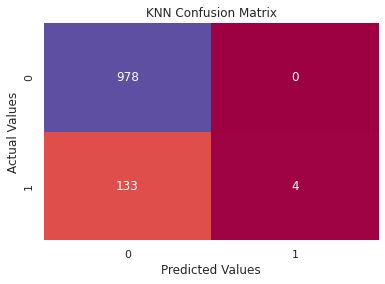

array([[978,   0],
       [133,   4]])

In [16]:
#Fitting the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)

y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)

my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

# Logistic Regression

Logistic Regression: Accuracy Score: 96.59%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       0.99      0.73      0.84       137

    accuracy                           0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.96      1115



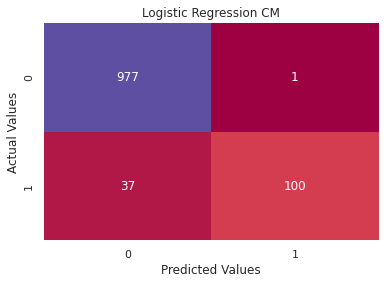

array([[977,   1],
       [ 37, 100]])

In [17]:
#Training the model
from sklearn.linear_model import LogisticRegression

log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)

y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)

my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

# Random Forest Classifier

Random Forest Accuracy Score: 97.85%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       978
           1       1.00      0.82      0.90       137

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



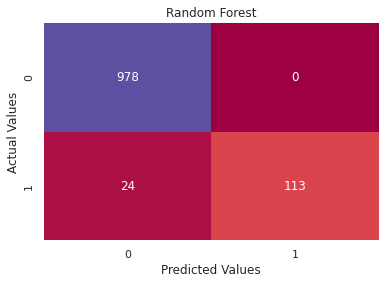

array([[978,   0],
       [ 24, 113]])

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)

my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest')

# Support Vector Classifier

SVC Accuracy Score: 98.57%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       978
           1       1.00      0.88      0.94       137

    accuracy                           0.99      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.99      0.99      1115



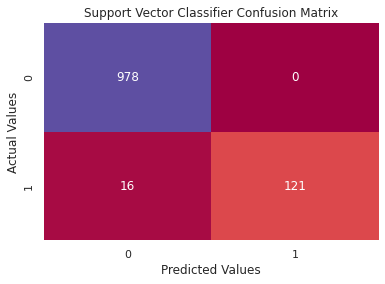

array([[978,   0],
       [ 16, 121]])

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)

my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

# MLP Classifier

MLP Accuracy Score: 98.74%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.99      0.91      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



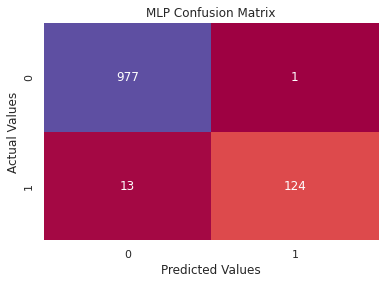

array([[977,   1],
       [ 13, 124]])

In [20]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier()
mlp.fit(tfidf_matrix_train, y_train)
y_pred_mlp=mlp.predict(tfidf_matrix_valid)

my_confusion_matrix(y_valid, y_pred_mlp, 'MLP Confusion Matrix', 'MLP')

# Neural Networks (Same as MLP CLassifier)

In [21]:
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [26]:
#Changing from csr matrix to array 
tfidf_matrix_train=tfidf_matrix_train.toarray()
tfidf_matrix_valid=tfidf_matrix_valid.toarray()

35/35 [==============================] - 1s 14ms/step
Neural Network Accuracy: Accuracy Score: 98.92%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.99      0.92      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



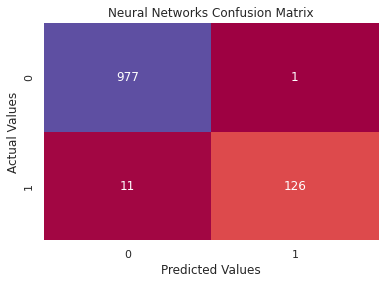

array([[977,   1],
       [ 11, 126]])

In [26]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(tfidf_matrix_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', # don't minimize the accuracy!
                   patience=10,
                   restore_best_weights=True)

NN_Classifier = model.fit(tfidf_matrix_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=0,
                    validation_data=(tfidf_matrix_valid, y_valid))

y_pred_NN=(model.predict(tfidf_matrix_valid) > 0.5).astype(int)
my_confusion_matrix(y_valid, y_pred_NN, 'Neural Networks Confusion Matrix', 'Neural Network Accuracy:')

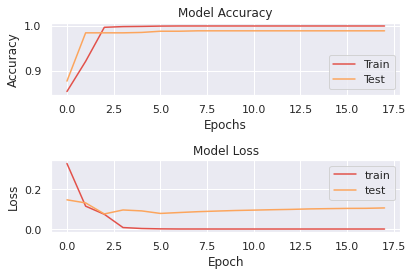

In [27]:
#Plotting Neural Network Training
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()